## Clustering of Beverages
### Using K-means Clustering


In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Part of the dataset
df=pd.read_csv("Data/clustering/bev.csv")
df.head(5)

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


In [5]:
feature_df = df.drop(labels='Name', axis=1)

In [6]:
# Features of the dataset
feature_df.head()

,Potassium,Sodium,Caffeine,Cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


In [7]:
# Standardization of all features (to help with precise clustering)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_df=scaler.fit_transform(feature_df)
feature_df[:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

### Performing K-means clustering

In [8]:
from sklearn.cluster import KMeans
clusters=KMeans(3)
clusters.fit(feature_df)

KMeans(n_clusters=3)

In [9]:
df['k_means_cluster_id'] = clusters.labels_
df

,Name,Potassium,Sodium,Caffeine,Cost,k_means_cluster_id
0,new_england_coffee,144,15,4.7,0.43,1
1,post_alley_blend,151,19,4.9,0.43,1
2,stumpdown_coffee,157,15,0.9,0.48,0
3,bizzy_organic_coffee,170,7,5.2,0.73,2
4,indian_bean,152,11,5.0,0.77,2
5,jacobs_coffee,145,23,4.6,0.28,1
6,grounds_hounds_coffee,175,24,5.5,0.40,1
7,la_columbe_corisca,149,27,4.7,0.42,1
8,lavazza_super_crema,99,10,4.3,0.43,0
9,mount_hagen,113,8,3.7,0.40,0


#### Visualizing clusters made by K-means

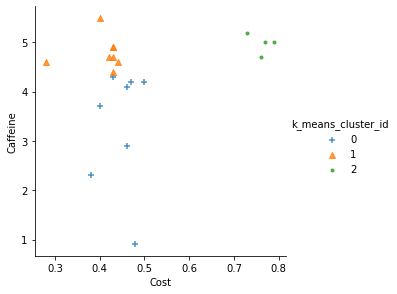

In [10]:
markers = ['+', '^', '.']
sn.lmplot("Cost", "Caffeine", data=df, hue ="k_means_cluster_id", fit_reg= False, markers=markers, height=4)